#### 4. 데이터 전처리

- 데이터 전처리는 데이터의 품질을 높이는 중요한 작업
- 데이터 생애주기 : 원시데이터 -> 데이터 전처리 -> 원천 데이터 -> 검증/레이블링 -> 레이블링 데이터
- 데이터 분석을 위한 필수 과정, 분석 결과 오류방지, 분석결과 신뢰도 향상
  
**데이터를 분석 및 처리에 적합한 형태로 만드는 과정을 총칭하는 개념**

- 아무리 좋은 도구나 분석기법도 품질이 낮은 데이터로 좋은 결과를 얻을 수 없다.
- 데이터 전처리 단계 : 데이터 정제 / 데이터 통합 / 데이터 변환 / 데이터 축소

#### 1. 데이터 정제
- 없는 데이터는 채우고, 잡음 데이터는 제거하고, 모순된 데이터는 올바르게 교정
- NaN, null, na 값의 제거
- 누락값, 불일치, 오류 수정
- 컴퓨터로 처리할 수 없는 데이터 제거
- 날짜나 숫자 등의 형식을 일치
- 모순데이터(남자인데 주민번호 8문자가 2인 경우)

#### 2. 데이터 통합
- 출처가 다른 상호 연관성이 있는 여러 데이터들을 하나로 결합하는 과정
- 표현단위가 다른 방식에 대한 일치
- 중복된 데이터를 검출

#### 3. 데이터 변환
- 다양한 형식으로 수집된 데이터를 분석에 용이하도록 일관성있는 데이터 형식으로 변환
- 정규화 : 데이터를 노멀하게 바꿔주는 것. 최대-최소 정규화, z-score 정규화, 소수 스케일링
- 평균화(평활화) : 잡음을 제거하기 위해 데이터범위(추세) 벗어난 값을 변환
- 속성 생성 : 데이터 분포를 대표할 수 있는 새로운 컬럼을 생성

#### 4. 데이터 축소
- 분석에 필요한 데이터를 축소, 고유한 특성은 손상되지 않도록 하고 분석 효율성을 향상키는 작업
- 데이터 압축 : 데이터 인코딩, 데이터 변환을 통해 데이터 포맷 변경
- 차원축소(PCA) : 특정 구간에 분포하는 값으로 스케일 변환

#### 데이터 전처리 절차
- 데이터 오류 분석
  - 결측값, 이상값, 노이즈, 모순 데이터, 불균형 데이터....
- 데이터 전처리 대상 선정
  - 모든 데이터 대상, 비정형/반정형 데이터에 집중.....
- 데이터 전처리 방법 결정
  - 삭제, 대체, 예측값 삽입, Scaling, 변수 추가, 변수 변환.....

##### 데이터 결측값 처리
- 삭제, 대체, 예측값 삽입, 수작업

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- 데이터셋에서 결측값 확인
  - df.info() : 컬럼별 데이터의 수
  - df.isnull() : 결측값이 True
  - df.isnull().sum() : 결측값이 몇개인지 확인

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- 데이터셋에서 결측값 처리 - 삭제
  - df.dropna() : 결측값이 있는 모든 행 삭제
  - df.dropna(axis=0) : 결측값이 있는 행 전체 삭제
  - titanic['embark_town'].dropna() : 'embark_town'열에서 결측값을 삭제하고 출력
  - titanic.dropna( thresh = int( len(titanic) / 2), axis=1) : 전체 데이터셋에서 50%이상 결측치를 포함하는 feature(변수, 필드, 컬럼) 삭제

In [16]:
int( len(titanic) / 2)

445

In [17]:
titanic = titanic.dropna( thresh = int( len(titanic) / 2), axis=1)

In [18]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

- 데이터셋에서 결측값 처리 - 대체
  - df.fillna() : 누락된 값에 통계 값으로 대체 하거나 모든 누락값을 '0'으로 대체
  - df.fillna(0) : 모든 결측값을 0으로 대체
  - df['age'].fillna(0) : 'age' 컬럼의 결측값을 0으로 대체
  - df['age'].fillna( df['age'].mean() ) : 평균값으로 누락값을 대체
  - 수치 데이터는 평균값을 범주형 데이터는 최빈값을 주로 사용
  - 0으로 대체하는 방법은 데이터의 편향(bias)가 발생 가능성이 높다.

C:\Users\kj\AppData\Local\Temp\ipykernel_504\4273747164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['age'])


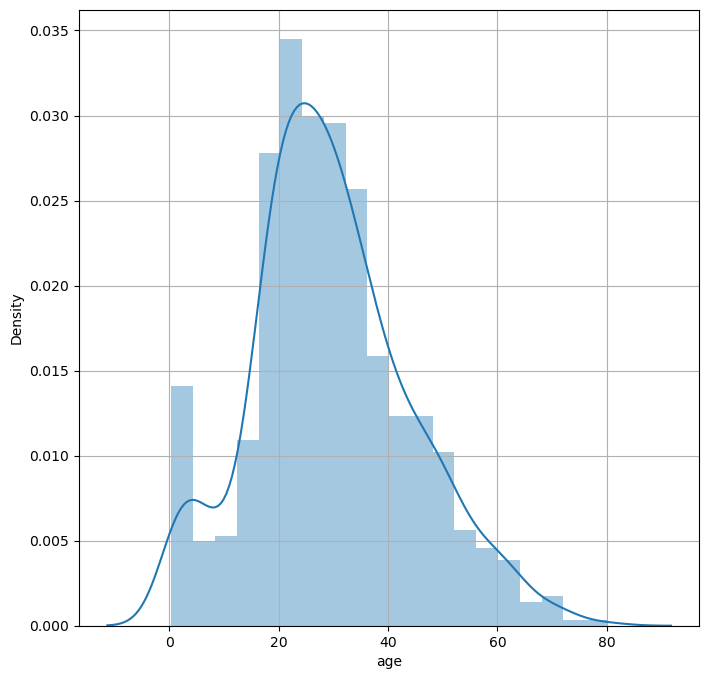

In [20]:
plt.figure(figsize=(8,8))
sns.distplot(titanic['age'])
plt.grid()
plt.show()

In [21]:
# age열의 결측치를 0으로 채움
age0 = titanic['age'].fillna(0)

In [22]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [23]:
age0

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [24]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [25]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


C:\Users\kj\AppData\Local\Temp\ipykernel_504\2389813882.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age0)


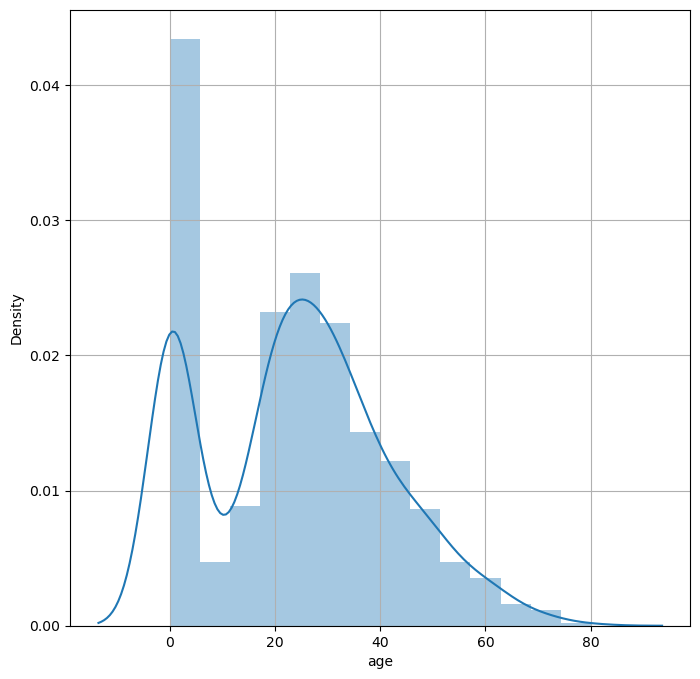

In [26]:
plt.figure(figsize=(8,8))
sns.distplot(age0)
plt.grid()
plt.show()

C:\Users\kj\AppData\Local\Temp\ipykernel_504\4277732442.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age1)


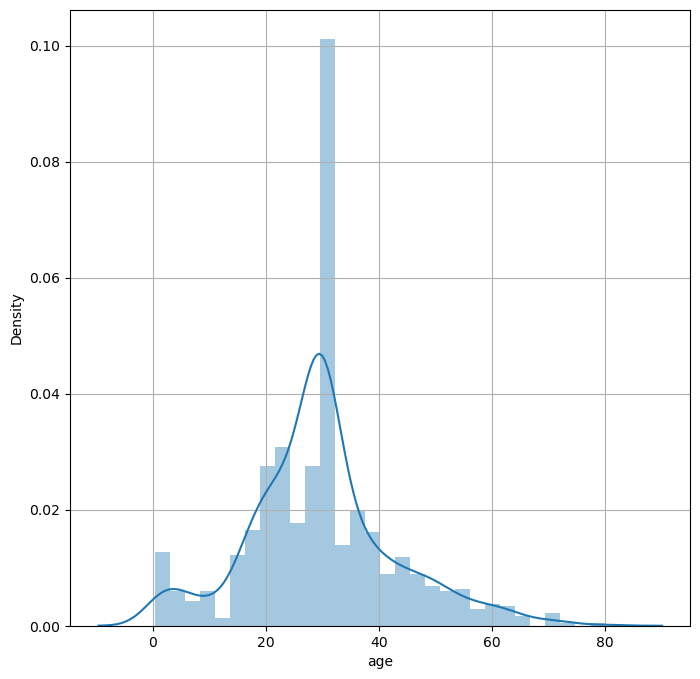

In [27]:
# age열의 결측치를 평균값으로 채움
age1 = titanic.age.fillna(titanic['age'].mean())
plt.figure(figsize=(8,8))
sns.distplot(age1)
plt.grid()
plt.show()

C:\Users\kj\AppData\Local\Temp\ipykernel_504\990162403.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age1)


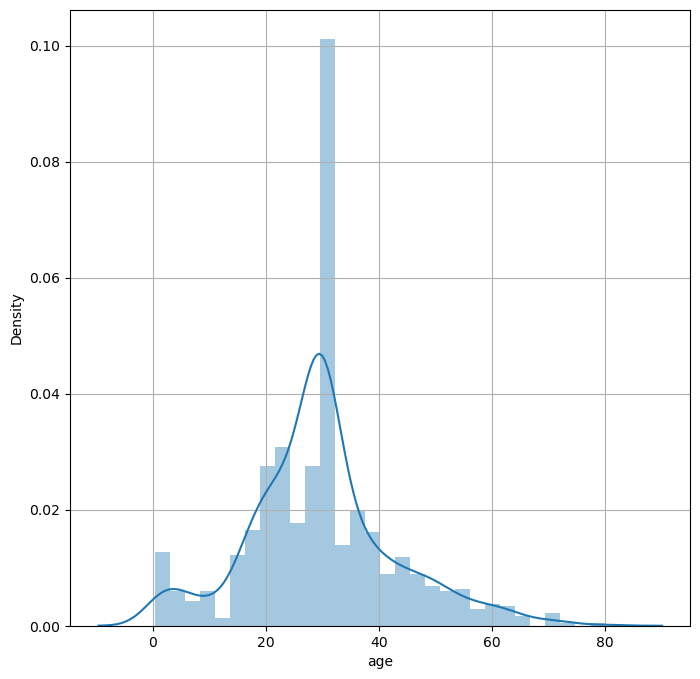

In [28]:
# age열의 결측치를 중앙값으로 채움
age2 = titanic['age'].fillna(titanic['age'].median())
plt.figure(figsize=(8,8))
sns.distplot(age1)
plt.grid()
plt.show()

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [30]:
titanic.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [31]:
titanic.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [32]:
titanic.age.fillna(titanic.age.median(), inplace=True)

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [77]:
titanic['embark_town'].mode()[0]

'Southampton'

In [35]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [36]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [79]:
titanic.fillna({'embark_town': titanic.embark_town.mode()[0]}, inplace=True)
# titanic.embark_town.fillna(titanic.embark_town.mode()[0], inplace=True)

In [81]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [83]:
titanic.fillna({'embarked': titanic.embarked.mode()[0]}, inplace=True)

In [85]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [73]:
titanic.embark_town.value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

#### 데이터 이상값 처리
- 이상값(Outlier) : 일반적인 다른 값과 멀리 동떨어진 값 (거리, 밀도 기준)

- 이상값이 발생되는 원인
  - 잘못 입력(수집), 고의적인 이상값, 표본 설정 오류

- 이상값 검출 방법
  - ESD(Extrem Studentized Deviation)
    - 평균과 표준편차를 이용해서 이상값의 범위를 한정 ( 평균 => m , 표준편차 => s )
    - m - 3s < 정상데이터 < m + 3s
  - 사분위수 이용
    - Q1 - IQR*1.5 < 정상데이터 < Q3 + IQR * 1.5
  - 기하평균 이용
    - 기하평균 - 2.5s < 정상데이터 < 기하평균 + 2.5s

- 이상값 데이터 확인 : 시각화
  - 히스토그램, 밀도차트 : 평균, 중앙값으로부터 먼 값
  - 박스플롯(상자차트) : 수염 밖으로 이상값이 별도 표시
  - 산포도(scatter) : 다른 값하고 멀리 떨어져 있는 값

- 분석기법을 이용한 이상값 확인
  - 비지도학습의 군집 기법
  - 마할라노비스 거리 : 데이터 분산을 고려한 거리, 다변량 이상값 판단에 대표적인 방법
  - iForest(Isolation forest) : Decision Tree(의사결정 트리), 분할 횟수로 이상값 검출

- 이상값 처리 방법
  - 삭제 : 이상값 포함 데이터 삭제
  - 대체 : 통계값(평균, 최빈값, 중앙값 등)
  - 회귀값 적용 : 회귀모델(결과가 어떤값)의 결과값으로 대체
  - 구간화 : 정렬된 데이터를 여러 개의 구간으로 배분한 후 구간 대표값으로 대체
  - 군집화 : 비슷한 성격을 가진 클러스터 단위로 묶은 다음 처리
  - 변환 : 오른쪽 꼬리가 긴 경우 => 로그변환, 제곱근 변환으로 큰 값을 작게 만들기
           왼쪽 꼬리가 긴 경우 => 지수변환, 제곱변환으로 작은 값을 크게 만들기